In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [58]:
df=pd.read_csv(r"C:\Users\User\Desktop\bhavya\datasets\datasets_143758_336483_world-happiness-report-2019.csv")
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [59]:
df.shape

(156, 11)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         156 non-null    object 
 1   Ladder                   156 non-null    int64  
 2   SD of Ladder             156 non-null    int64  
 3   Positive affect          155 non-null    float64
 4   Negative affect          155 non-null    float64
 5   Social support           155 non-null    float64
 6   Freedom                  155 non-null    float64
 7   Corruption               148 non-null    float64
 8   Generosity               155 non-null    float64
 9   Log of GDP
per capita    152 non-null    float64
 10  Healthy life
expectancy  150 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [61]:
df.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

In [62]:
df.describe()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
count,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000
mean,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
std,45.177428,45.177428,44.888751,44.888751,44.888751,44.888751,42.868014,44.888751,44.022721,43.445368
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,39.750000,39.750000,39.500000,39.500000,39.500000,39.500000,37.750000,39.500000,38.750000,38.250000
50%,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
75%,117.250000,117.250000,116.500000,116.500000,116.500000,116.500000,111.250000,116.500000,114.250000,112.750000
max,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


In [63]:
numerical_features=df.drop(['Country (region)'],axis=1)

In [64]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()],
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=numerical_features.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Ladder,156.0,0.0,12246.0,78.5,78.5,45.177428,2041.000000,1.0,2.55,8.75,16.5,39.75,78.5,117.25,140.5,148.25,154.45,156.0
SD of Ladder,156.0,0.0,12246.0,78.5,78.5,45.177428,2041.000000,1.0,2.55,8.75,16.5,39.75,78.5,117.25,140.5,148.25,154.45,156.0
Positive affect,155.0,1.0,12090.0,78.0,78.0,44.888751,2015.000000,1.0,2.54,8.70,16.4,39.50,78.0,116.50,139.6,147.30,153.46,155.0
Negative affect,155.0,1.0,12090.0,78.0,78.0,44.888751,2015.000000,1.0,2.54,8.70,16.4,39.50,78.0,116.50,139.6,147.30,153.46,155.0
Social support,155.0,1.0,12090.0,78.0,78.0,44.888751,2015.000000,1.0,2.54,8.70,16.4,39.50,78.0,116.50,139.6,147.30,153.46,155.0
Freedom,155.0,1.0,12090.0,78.0,78.0,44.888751,2015.000000,1.0,2.54,8.70,16.4,39.50,78.0,116.50,139.6,147.30,153.46,155.0
Corruption,148.0,8.0,11026.0,74.5,74.5,42.868014,1837.666667,1.0,2.47,8.35,15.7,37.75,74.5,111.25,133.3,140.65,146.53,148.0
Generosity,155.0,1.0,12090.0,78.0,78.0,44.888751,2015.000000,1.0,2.54,8.70,16.4,39.50,78.0,116.50,139.6,147.30,153.46,155.0
Log of GDP\nper capita,152.0,4.0,11628.0,76.5,76.5,44.022721,1938.000000,1.0,2.51,8.55,16.1,38.75,76.5,114.25,136.9,144.45,150.49,152.0
Healthy life\nexpectancy,150.0,6.0,11325.0,75.5,75.5,43.445368,1887.500000,1.0,2.49,8.45,15.9,38.25,75.5,112.75,135.1,142.55,148.51,150.0


In [65]:
#since there are no outliers in the data, filling the null values with mean values for that column
df["Positive affect"].fillna(df['Positive affect'].mean(), inplace = True)
df["Negative affect"].fillna(df['Negative affect'].mean(), inplace = True)
df["Social support"].fillna(df['Social support'].mean(), inplace = True)
df["Freedom"].fillna(df['Freedom'].mean(), inplace = True)
df["Corruption"].fillna(df['Corruption'].mean(), inplace = True)
df["Generosity"].fillna(df['Generosity'].mean(), inplace = True)
df["Log of GDP\nper capita"].fillna(df['Log of GDP\nper capita'].mean(), inplace = True)
df["Healthy life\nexpectancy"].fillna(df['Healthy life\nexpectancy'].mean(), inplace = True)

In [66]:
df.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             0
Negative affect             0
Social support              0
Freedom                     0
Corruption                  0
Generosity                  0
Log of GDP\nper capita      0
Healthy life\nexpectancy    0
dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text xticklabel objects>)

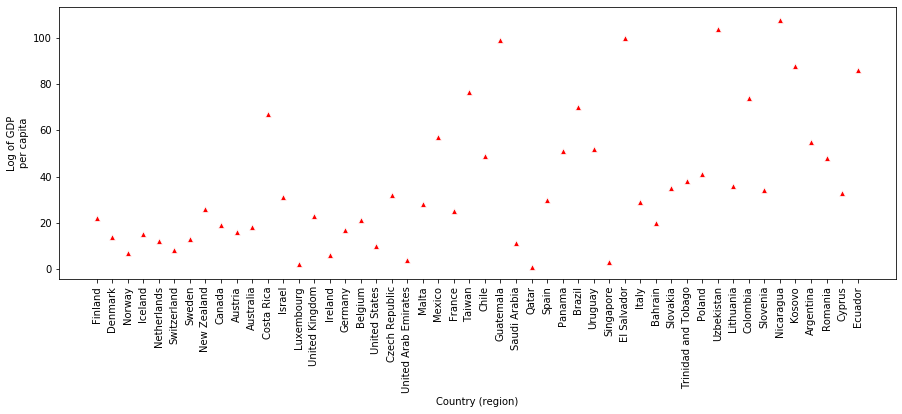

In [67]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Country (region)',y='Log of GDP\nper capita',data=df[:50], marker='^', color='red')
plt.xticks(rotation=90)

In [68]:
#finding correlations between the variables

In [69]:
df.corr()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,1.000000,0.539362,0.489512,0.521598,0.814649,0.544642,0.186494,0.495912,0.801488,0.805928
SD of Ladder,0.539362,1.000000,0.085373,0.619211,0.599410,0.251834,0.254893,0.392119,0.622593,0.603447
Positive affect,0.489512,0.085373,1.000000,0.389697,0.386269,0.681770,0.205777,0.354877,0.291743,0.324578
Negative affect,0.521598,0.619211,0.389697,1.000000,0.621888,0.430241,0.157004,0.338226,0.523199,0.473442
Social support,0.814649,0.599410,0.386269,0.621888,1.000000,0.448903,0.117153,0.442432,0.751087,0.737408
Freedom,0.544642,0.251834,0.681770,0.430241,0.448903,1.000000,0.373821,0.489991,0.398620,0.411450
Corruption,0.186494,0.254893,0.205777,0.157004,0.117153,0.373821,1.000000,0.259616,0.188692,0.119435
Generosity,0.495912,0.392119,0.354877,0.338226,0.442432,0.489991,0.259616,1.000000,0.472473,0.419019
Log of GDP\nper capita,0.801488,0.622593,0.291743,0.523199,0.751087,0.398620,0.188692,0.472473,1.000000,0.827036
Healthy life\nexpectancy,0.805928,0.603447,0.324578,0.473442,0.737408,0.411450,0.119435,0.419019,0.827036,1.000000


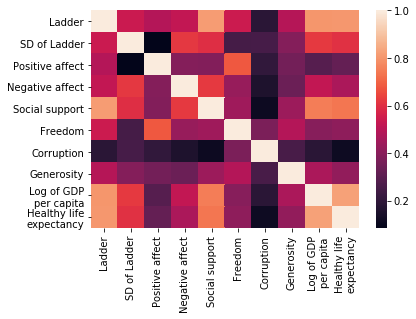

In [70]:
sns.heatmap(df.corr())

In [71]:
#splittig countries into continents
asia = ["Israel", "United Arab Emirates", "Singapore", "Thailand", "Taiwan Province of China",
                 "Qatar", "Saudi Arabia", "Kuwait", "Bahrain", "Malaysia", "Uzbekistan", "Japan",
                 "South Korea", "Turkmenistan", "Kazakhstan", "Turkey", "Hong Kong S.A.R., China", "Philippines",
                 "Jordan", "China", "Pakistan", "Indonesia", "Azerbaijan", "Lebanon", "Vietnam",
                 "Tajikistan", "Bhutan", "Kyrgyzstan", "Nepal", "Mongolia", "Palestinian Territories",
                 "Iran", "Bangladesh", "Myanmar", "Iraq", "Sri Lanka", "Armenia", "India", "Georgia",
                 "Cambodia", "Afghanistan", "Yemen", "Syria"]
europe = ["Norway", "Denmark", "Iceland", "Switzerland", "Finland",
                 "Netherlands", "Sweden", "Austria", "Ireland", "Germany",
                 "Belgium", "Luxembourg", "United Kingdom", "Czech Republic",
                 "Malta", "France", "Spain", "Slovakia", "Poland", "Italy",
                 "Russia", "Lithuania", "Latvia", "Moldova", "Romania",
                 "Slovenia", "North Cyprus", "Cyprus", "Estonia", "Belarus",
                 "Serbia", "Hungary", "Croatia", "Kosovo", "Montenegro",
                 "Greece", "Portugal", "Bosnia and Herzegovina", "Macedonia",
                 "Bulgaria", "Albania", "Ukraine"]
north_america = ["Canada", "Costa Rica", "United States", "Mexico",  
                 "Panama","Trinidad and Tobago", "El Salvador", "Belize", "Guatemala",
                 "Jamaica", "Nicaragua", "Dominican Republic", "Honduras",
                 "Haiti"]
south_america = ["Chile", "Brazil", "Argentina", "Uruguay",
                 "Colombia", "Ecuador", "Bolivia", "Peru",
                 "Paraguay", "Venezuela"]
australia = ["New Zealand", "Australia"]
d_asia = dict.fromkeys(asia, 'Asia')
d_europe = dict.fromkeys(europe, 'Europe')
d_north_america = dict.fromkeys(north_america, 'North America')
d_south_america = dict.fromkeys(south_america, 'South America')
d_australia = dict.fromkeys(australia, 'Australia')
continent_dict = {**d_asia, **d_europe, **d_north_america, **d_south_america, **d_australia}
df["continent"] = df["Country (region)"].map(continent_dict)
df.continent.fillna("Africa", inplace=True)

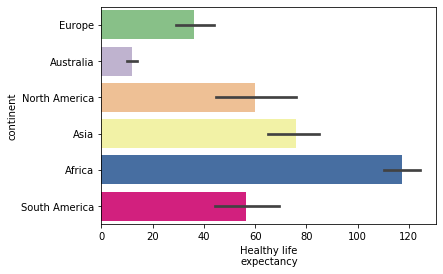

In [72]:
sns.barplot(x="Healthy life\nexpectancy", y="continent", data=df, palette='Accent')

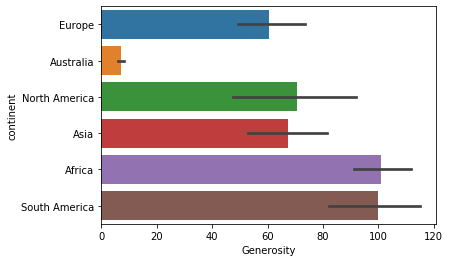

In [73]:
sns.barplot(x='Generosity',y='continent', data=df)

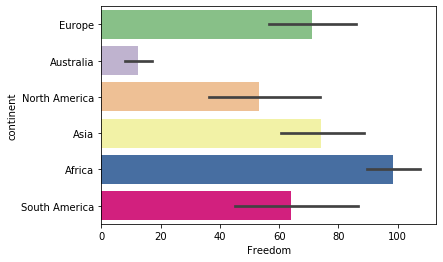

In [74]:
sns.barplot(x='Freedom',y='continent',data=df,palette='Accent')

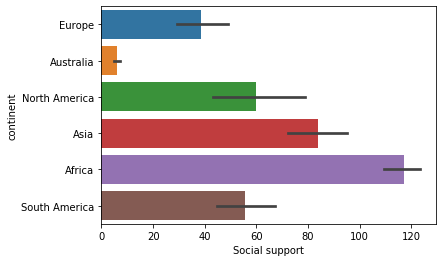

In [75]:
sns.barplot(x='Social support',y='continent',data=df)

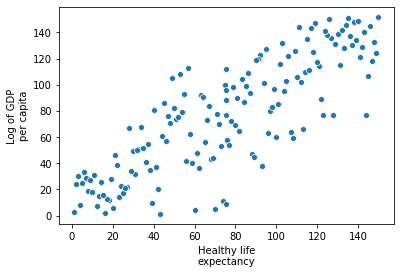

In [76]:
sns.scatterplot(x='Healthy life\nexpectancy',y='Log of GDP\nper capita',data=df)

#The graph shows there exists a positive relationship between log of GDP per capita and Health/life Expectancy. Also, if we calculate the correlation between these two we get 0.82 which is good.

In [77]:
df.head(2)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy,continent
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,Europe
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,Europe


df.rename(columns={'Log of GDP\nper Capita':'GDP','Healthylife\nexpectancy':'hl_expectancy'}, inplace=True)


In [78]:
df.head(2) 

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy,continent
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,Europe
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,Europe


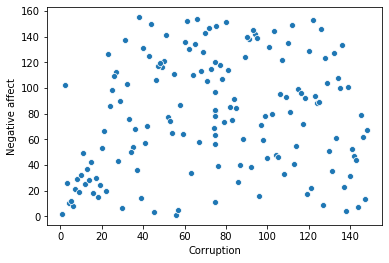

In [79]:
sns.scatterplot(x='Corruption',y='Negative affect',data=df, marker='o')